## 서포트 벡터 머신이란 무엇인가

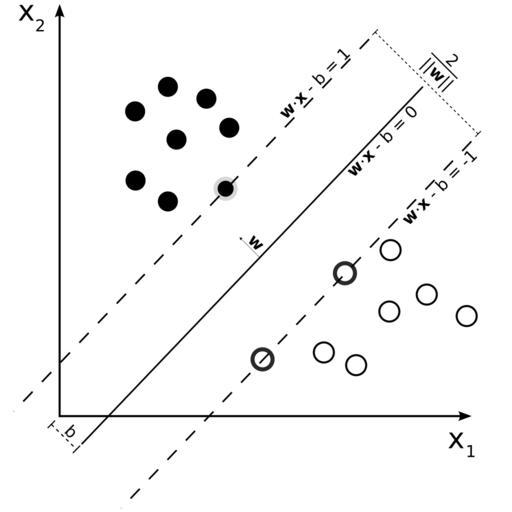

 * 서포트 벡터 머신(SVM)은 매우 강력하고 선형이나, 비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신러닝 모델임
 * 머신러닝에서 인기있는 모델임 반드시 익혀야 모델임
 *  SVM 은 복잡한 분류 문제에 잘 들어 맞으며, 작거나 중간 크기의 데이터 셋에 적합하다. 
 * SVM은 특성스케일에 아주 민감하다.(sklearn의  standard scaler를 사용 권장)

# 서포트 벡터 머신의 분류

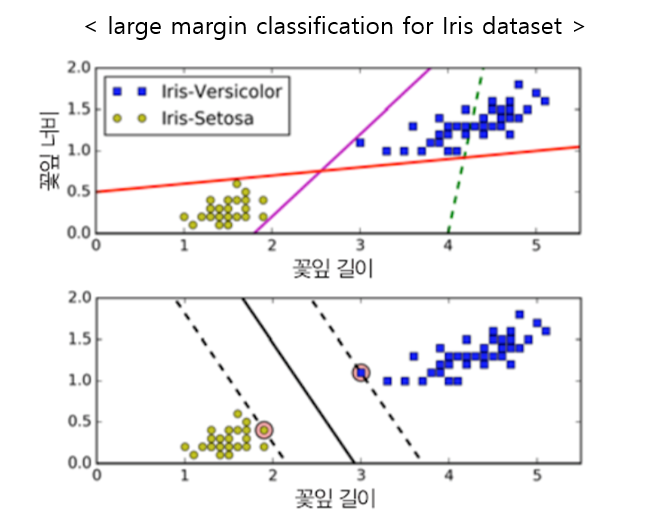

* 위 그림의 iris 데이터셋을 보면 SVM을 표현한 것임
* 첫 번째 그림의 실선은 두 개의 클래스를 잘 분류하지 못하고 있다.
* 첫 번째 그림의 다른 두 모델 분류기는 정확히 분류는 하고 있으나, 모델 분류기의 선이 훈련 데이터와 너무 가까워서, 만약 새로운 new 데이터가 온다면 정확히 분류하지 못할 수도 있다.
* 두 번째 그림은 SVM 분류기의 결정 경계이다.
* 이 직선은 두 개의 클래스를 나누고 있을 뿐만 아니라, 클래스를 나누는 결정경계가 훈련샘플로부터 최대한 멀리 떨어져 있다.
* 그래서 SVM 분류기는 클래스 사이의 가장 폭이 넓은 구간을 찾는 것으로 이해할 수 있다. 그리고 이를 large margin classification(라지 마진 분류)라고 부른다.
* 방금 말한 SVM의 목적 때문에, 마진 구간 바깥쪽의 데이터는 결정 경계에 전혀 영향을 주지 않고, 오로지 마진 구간 근처에 위치한 샘플에만 결정경계는 영향을 받게 된다.
* 그리고 이렇게 영향을 주는 샘플들을 Support Vector(서포트 벡터)라고 부른다.
* SVM 개요에서 말한 것처럼 SVM은 특성 스케일에 민감하므로, 보통 사이킷런의 StandardScaler을 사용하면 결정경계의 명확성을 높일 수 있다.

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [3]:
iris = datasets.load_iris()
x=iris['data'][:,(2,3)]  #[:,2:]
y=(iris['target']==2).astype('int') #index=2 versinica

#사이킷런의 파이프란 라이브러리를 통해서 데이터 스케일과 모델 적합을 한번 할 수 있음 
svm_clf = Pipeline([
  ('scaler',StandardScaler()),
  ('linear_svc',LinearSVC(C=1,loss='hinge'))
])

#모델 훈련
svm_clf.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [4]:
#꽃잎 길이 5.5 , 너비 1.7 의 iris데이터를 예측한다고 가정
new_iris=[[5.5,1.7]]
prediction = svm_clf.predict(new_iris)[0]

print(prediction)  #1 : versinica True 

1


In [5]:
model = SVC(kernel='rbf',probability=True)
model.fit(x,y)
prob=model.predict_proba(new_iris)[0]
print(prob) #verinica False 확률 3.6%, True 96%

[0.03867382 0.96132618]


* SVM 분류기는 기존 로지스틱 회귀처럼 클래스에 대한 확률, 즉 predict_proba() 메서드를 제공하지 않지만, SVC모델안에 probability=True 매개변수를 주게되면 predict_proba()메서드 사용 가능
* 위 방법말고, SVC(kernel='linear',C=1)과 같이 SVC 모델을 사용 가능 (훈련세트가 커지면 속도 느려져 권장 X)
*  c는 규제항으로 cost 의 약자로  얼마나 많은 데이터 샘플이 다른 클래스에 놓이는 것을 허용하는지를 결정한다.   C의 유무에 따라 하드마진(hard-margin) SVM, 소프트마진(soft-margin) SVM이라고 불린다. 

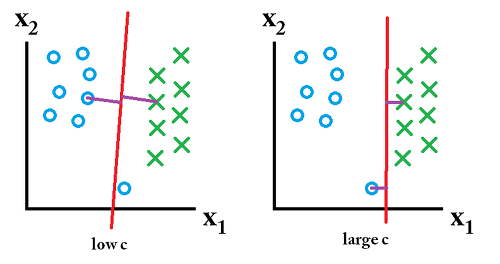

* 위 방법말고, SGDClassifier(loss='hinge', alpha=1/(m*C)) <m = 샘플수>를 사용 할 수 있다. 이는 LinearSVC만큼 빠르게 수렴하지는 않지만 데이터셋이 아주 커서 메모리에 적재 불가능하거나, 온라인 학습으로 분류 문제를 다룰 때는 유용하다

 * 커널 기법은 주어진 데이터를 고차원 특징 공간으로 사상해주는 것이다.
 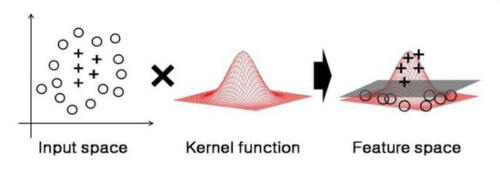
 * 커널에는 Polynomial 커널, Sigmoid 커널, 가우시안 RBF 커널 등 종류가 많음 
 * 그 중 가장 성능이 좋아 자주 사용되는 것이 가우시안 RBF 커널임
 * 각 커널마다 최적화를 도와주는 매개변수들이 따로 있고 RBF 커널의 경우 gamma라는 매개변수를 사용자가 조정해야함
 * SVM의 기본 매개변수인 C도 있으므로 총 2개의 매개변수를 설정해줘야함. 
 * gamma의 역할은 하나의 데이터 샘플이 영향력을 행사하는 거리를 결정한다. gamma는 가우시안 함수의 표준편차와 관련되어 있는데, 클수록 작은 표준편차를 갖는다. 
 * 즉, gamma가 클수록 한 데이터 포인터들이 영향력을 행사하는 거리가 짧아지는 반면, gamma가 낮을수록 커진다. 
 * 요약 : SVM 알고리즘 중에서 가장 성능이 괜찮고 일반적으로 널리 사용되는 것은 RBF 커널 SVM이고, 좋은 성능을 얻으려면 매개변수인 C와 gamma를 잘 조정해줘야 한다. C는 데이터 샘플들이 다른 클래스에 놓이는 것을 허용하는 정도를 결정하고, gamma는 결정 경계의 곡률을 결정한다. 두 값 모두 커질수록 알고리즘의 복잡도는 증가하고, 작아질수록 복잡도는 낮아진다. 일반적으로 grid search로 경험적으로 최적의 매개변수 값들을 찾아가는데, 이상 설명한 내용을 어느 정도 숙지하고 있다면 훨씬 더 빠르게 좋은 성능을 내는 매개변수 값들을 찾아낼 수 있을 것이다. 



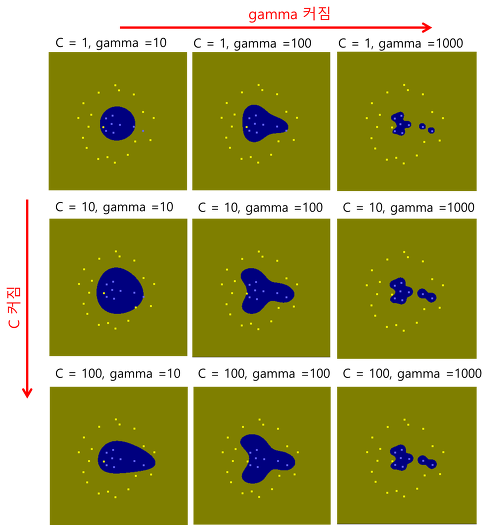

# 비선형 SVM 
* 선형 SVM이 많은 경우에서 잘 작동하지만, 데이터셋 자체가 선형으로 잘 분류할 수 없는 경우도 많다.
* 간단히 이러한 데이터셋에서는 다항 특성(polynomial)인 아래와 같은 특성을 추가하면 된다.

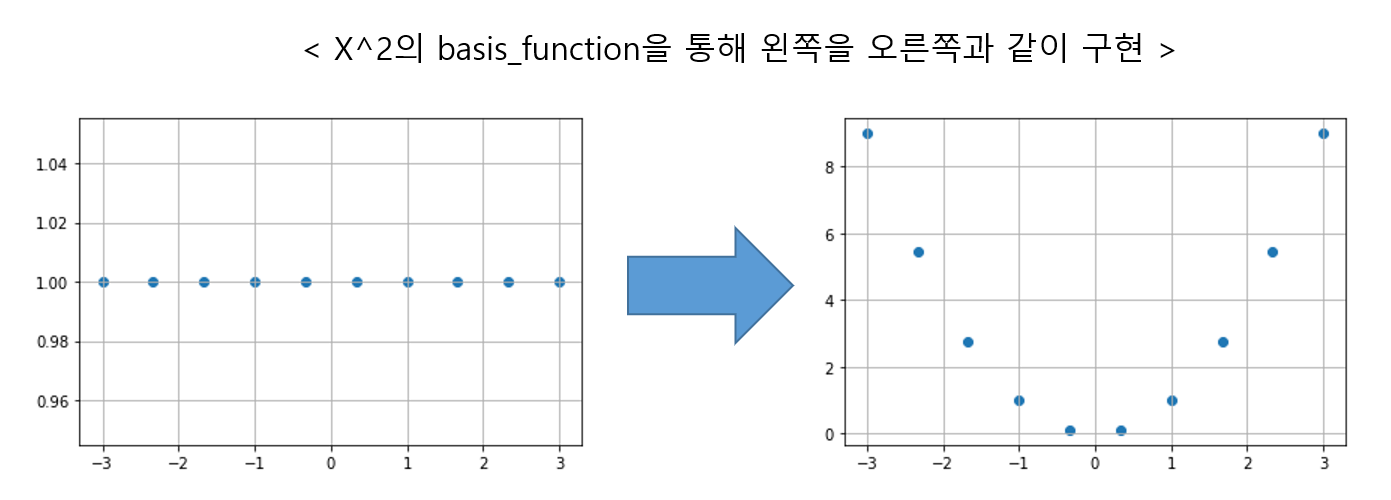

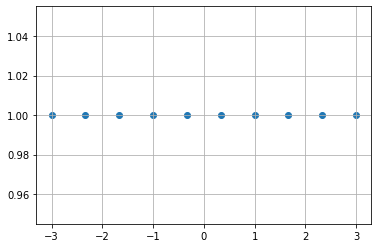

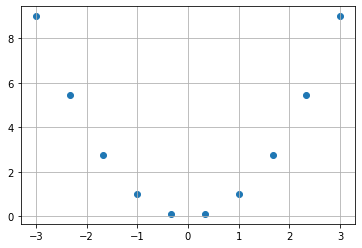

In [10]:
import matplotlib.pyplot as plt
x = np.linspace(-3,3,10)
y = np.linspace(1,1,10)
plt.scatter(x,y)
plt.grid()
plt.show()
b_func = x**2
plt.scatter(x,b_func)
plt.grid()
plt.show()

## make moons 데이터 학습

In [8]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

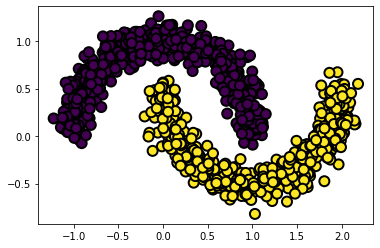

In [13]:
#샘플수 1000개 noise 0,1 random_stae = 2022
x,y = make_moons(n_samples=1000,noise=0.1,random_state=2022)
plt.scatter(x[:,0],x[:,1],marker='o',c=y,s=100,edgecolor='black',linewidths=2)
plt.show()

In [14]:
#변수 : polynomial 3차다항식 사용, scaler :standardZScaler , 모델 : LinearSVM (c=10,loss='hinge')
polynomial_std_svm = Pipeline([
  ('polynomial',PolynomialFeatures(degree=3)),
  ('std',StandardScaler()),
  ('svm',LinearSVC(C=10,loss='hinge'))                               
])

polynomial_std_svm.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                ('std', StandardScaler()),
                ('svm', LinearSVC(C=10, loss='hinge'))])

### 예측

In [15]:
#첫번째 변수값 2.0 두번째 변수값 1.0 새로운 데이터 예측
new_moon = [[2.0,1.0]]
polynomial_std_svm.predict(new_moon)

array([1])

* hinge loss 은 분류기, 특히 SVM 훈련에 사용되는 손실 함수입니다. default 값으로 사용됨
* sj는 정답이 아닌 클래스의 score
* syi는 정답클래스 score
* 조건에서 만약 '정답'클래스(syi)가 정답이 아닌 클래스 (sj) + safety margin(여기서1) 값보다 크면 loss는 0이다!라는 것임
* 만약 위조건이 아니면 즉, 정답이 '아닌' 클래스(sj)-정답클래스 + safety margin(여기서1)의 값을 loss로 가져가라 라는 의미
* 정리하면 정답클래스가 아닌 클래스보다 safety margin 보다 크면 그냥 그건 loss가 0이고 loss가 0은 매우 좋다는 의미임

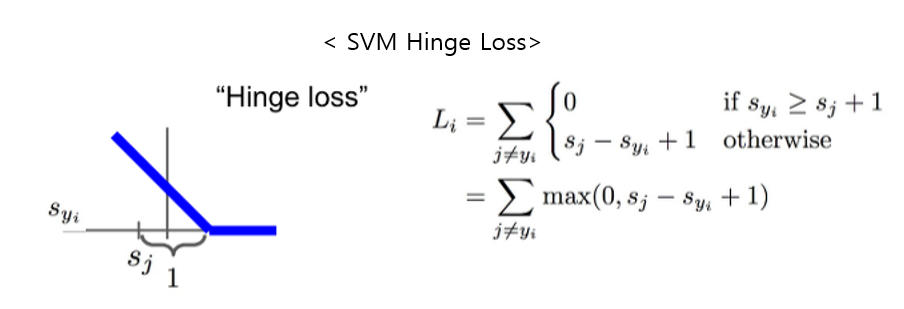

# 커널(다항식, 가우시안RBF)
## 다항식 커널

* 다항식 특성(PolynomialFeatures)을 추가하는 것처럼 간단하고 모든 머신러닝 알고리즘에서 잘 동작한다.
* 하지만 낮은 차수의 다항식은 복잡한 모델을 표현하기 쉽지 않기 때문에, 굉장히 많은 차수를 사용하여서 모델을 학습해야한다.
* 그런데 많은 차수를 사용한 모델은 학습속도를 무시무시하게 떨어트리고 심지어 동작 자체를 안하는 경우도 있다.
* 데이터 변환을 통해 비선형적인 데이터를 분류를 하고 싶고, 모델 학습에도 지장을 주지 않는 효율적인 방법은 없을까라는 고민끝에, SVM을 사용할 땐 kernel trick이라는 수학적 기교를 사용할 수 있다.
* 실제로 특성을 추가하지 않았음에도, 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있다.
* 다시 moons 데이터셋을 통한 실습

In [17]:
from sklearn.svm import SVC
#kernel = 'poly' (degree=3) 사용
#매개변수 coef0 - 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절, 적절한 값으로 지정하면 고차항의 영향을 줄일 수 있다
poly_kernel_std_svm=Pipeline([
  ('std',StandardScaler()),
  ('poly_kernel_svm',SVC(kernel='poly',degree=3,coef0=1,C=5))
])

poly_kernel_std_svm.fit(x,y)

Pipeline(steps=[('std', StandardScaler()),
                ('poly_kernel_svm', SVC(C=5, coef0=1, kernel='poly'))])

## 가우시안 RBF 커널

* 다항 특성 방식과 마찬가지로 유사도 특성 방식을 모델에 적용할 수 있다.
* 다항식 커널에서 말한 것과 같이 추가 특성을 계산하려면 엄청난 시간과 비용이 발생한다. (특히 훈련 세트가 클 경우 심해짐)
* 하지만 마찬가지로 커널 트릭 방식을 사용하면, 실제 특성을 추가하지 않고 유사도 특성을 많이 추가한 것과 같은 효과를 얻을 수 있다.

In [18]:
rbf_kernel_std_svm = Pipeline([
  ('std',StandardScaler()),
  ('rbf_kernel_svm',SVC(kernel='rbf',gamma=3,C=0.0001))                                
])

rbf_kernel_std_svm.fit(x,y)

Pipeline(steps=[('std', StandardScaler()),
                ('rbf_kernel_svm', SVC(C=0.0001, gamma=3))])

* regression,  classification 이론 및 모형들 통해서 전반적인 supervised learning의 이해를 하였음
* 앞으로 배울 decision tree, ensemble의 내용도 sklearn의 구조에서 크게 벗어나지 않기 때문에 학습하는데 어려움이 많지 않을 것임